## Project - 3 : Bank Personal Loan Modelling

#### Author : Ragu RAVICHANDRAN

#### Dataset : Bank_Personal_Loan_Modelling.csv

=========================================================================================================================

Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set(color_codes=True)

Read dataset into pandas dataframe

In [2]:
bdf = pd.read_csv('Bank_Personal_Loan_Modelling.csv')

Display top 5 rows from bank dataframe

In [3]:
bdf.head(5)

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


Info on dataset

In [4]:
bdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
ID                    5000 non-null int64
Age                   5000 non-null int64
Experience            5000 non-null int64
Income                5000 non-null int64
ZIP Code              5000 non-null int64
Family                5000 non-null int64
CCAvg                 5000 non-null float64
Education             5000 non-null int64
Mortgage              5000 non-null int64
Personal Loan         5000 non-null int64
Securities Account    5000 non-null int64
CD Account            5000 non-null int64
Online                5000 non-null int64
CreditCard            5000 non-null int64
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [5]:
bdf.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


In [6]:
bdf.shape

(5000, 14)

In [7]:
#check to see if any of the columsn have null data in the file
bdf.apply(lambda x: sum(x.isnull()), axis=0)

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

Finding unique values in the dataset

In [8]:
bdf.apply(lambda x: len(x.unique()))

ID                    5000
Age                     45
Experience              47
Income                 162
ZIP Code               467
Family                   4
CCAvg                  108
Education                3
Mortgage               347
Personal Loan            2
Securities Account       2
CD Account               2
Online                   2
CreditCard               2
dtype: int64

Looking at the experience column, we have negative values

In [9]:
bdf[bdf['Experience'] < 0]['Experience'].count()

52

Clean the data on Experience column for which there are negative values

In [10]:
pExp = bdf.loc[bdf['Experience'] >= 0]

nExp_bool = bdf['Experience'] < 0

colExp = 'Experience'
# Get the ID column value for those which has Negative Experience
mylist = bdf.loc[nExp_bool]['ID'].tolist()


In [13]:
nExp_bool.value_counts()

False    4948
True       52
Name: Experience, dtype: int64

In [14]:
len(mylist)

52

In [15]:
#for id in mylist:
#    bdf[bdf['ID']==id]

In [16]:
import math

In [17]:
for id in mylist:
    #print (bdf[bdf['ID']==id])
    ageList = bdf.loc[np.where(bdf['ID']==id)]['Age'].tolist()[0]
    eduList = bdf.loc[np.where(bdf['ID']==id)]['Education'].tolist()[0]
    pExp_data = pExp[(pExp['Age'] == ageList) & (pExp['Education'] == eduList)]
    
    median_exp = pExp_data['Experience'].median()
    if math.isnan(median_exp):
        median_exp = 0.0
    bdf.loc[bdf.loc[np.where(bdf['ID']==id)].index, 'Experience'] = median_exp

Checking whether there are anymore negative experience in the data

In [18]:
bdf[bdf['Experience'] < 0]['Experience'].count()

0

In [19]:
bdf[bdf['Experience'].isnull()]

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard


In [20]:
#check to see if any of the columsn have null data in the file
bdf.apply(lambda x: sum(x.isnull()), axis=0)

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

In [21]:
bdf.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.123000,11.434860,0.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


Distribution of Target variable in Boxplot

Text(0.5, 1.0, 'Distribution of target variable')

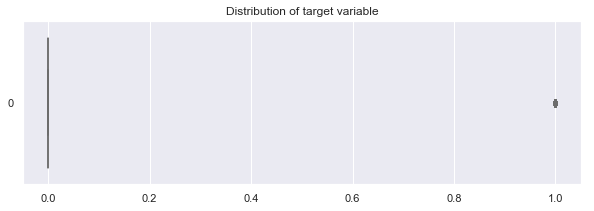

In [22]:
plt.figure(figsize=(10,3))
sns.boxplot(data=bdf['Personal Loan'], orient='horizontal', palette='husl')
plt.title("Distribution of target variable")

Influence of Income and Education on Personal Loan

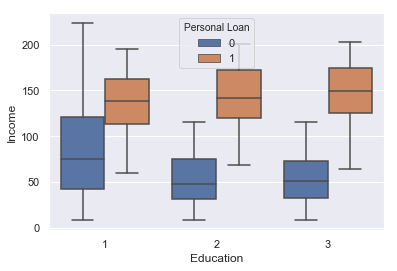

In [23]:
sns.boxplot(x='Education',y='Income',hue='Personal Loan',data=bdf)

Drop ID column and store in new dataframe

In [24]:
pldf = bdf.drop(['ID'], axis=1)
pldf.head(5)

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1.0,49,91107,4,1.6,1,0,0,1,0,0,0
1,45,19.0,34,90089,3,1.5,1,0,0,1,0,0,0
2,39,15.0,11,94720,1,1.0,1,0,0,0,0,0,0
3,35,9.0,100,94112,1,2.7,2,0,0,0,0,0,0
4,35,8.0,45,91330,4,1.0,2,0,0,0,0,0,1


Checking for any correlation

In [25]:
pldf.corr()

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
Age,1.000000,0.994229,-0.055269,-0.029216,-0.046418,-0.052012,0.041334,-0.012539,-0.007726,-0.000436,0.008043,0.013702,0.007681
Experience,0.994229,1.000000,-0.046840,-0.028637,-0.052296,-0.049988,0.013751,-0.010907,-0.007959,-0.001156,0.009975,0.013799,0.008992
Income,-0.055269,-0.046840,1.000000,-0.016410,-0.157501,0.645984,-0.187524,0.206806,0.502462,-0.002616,0.169738,0.014206,-0.002385
ZIP Code,-0.029216,-0.028637,-0.016410,1.000000,0.011778,-0.004061,-0.017377,0.007383,0.000107,0.004704,0.019972,0.016990,0.007691
Family,-0.046418,-0.052296,-0.157501,0.011778,1.000000,-0.109275,0.064929,-0.020445,0.061367,0.019994,0.014110,0.010354,0.011588
CCAvg,-0.052012,-0.049988,0.645984,-0.004061,-0.109275,1.000000,-0.136124,0.109905,0.366889,0.015086,0.136534,-0.003611,-0.006689
Education,0.041334,0.013751,-0.187524,-0.017377,0.064929,-0.136124,1.000000,-0.033327,0.136722,-0.010812,0.013934,-0.015004,-0.011014
Mortgage,-0.012539,-0.010907,0.206806,0.007383,-0.020445,0.109905,-0.033327,1.000000,0.142095,-0.005411,0.089311,-0.005995,-0.007231
Personal Loan,-0.007726,-0.007959,0.502462,0.000107,0.061367,0.366889,0.136722,0.142095,1.000000,0.021954,0.316355,0.006278,0.002802
Securities Account,-0.000436,-0.001156,-0.002616,0.004704,0.019994,0.015086,-0.010812,-0.005411,0.021954,1.000000,0.317034,0.012627,-0.015028


Generating heatmap

In [26]:
def gen_heatmap(x):
    plt.figure(figsize=(15,10))
    sns.heatmap(data=pldf.corr(), annot=True, fmt='.2f', vmax=.8, square=True, cmap='coolwarm')
    plt.title('Correlation')
    

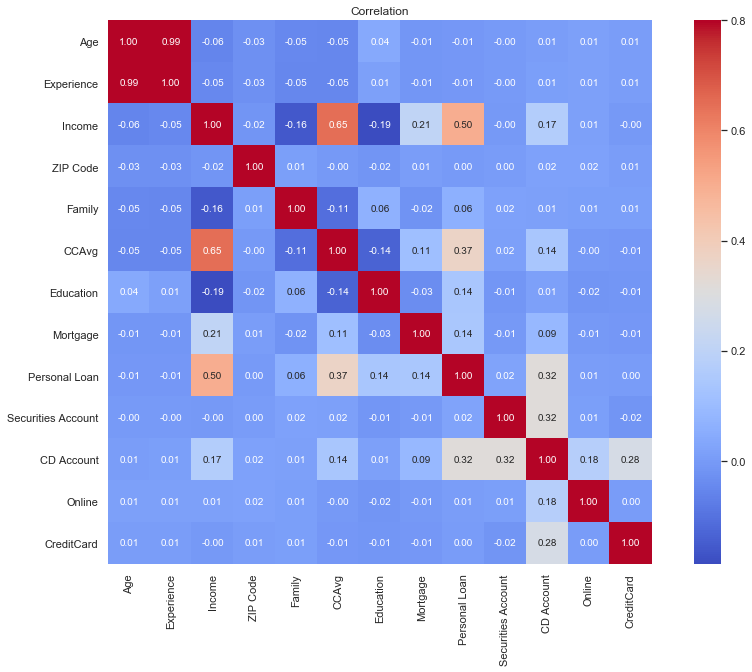

In [27]:
gen_heatmap(pldf)

In [28]:
pldf['Personal Loan'].value_counts()

0    4520
1     480
Name: Personal Loan, dtype: int64

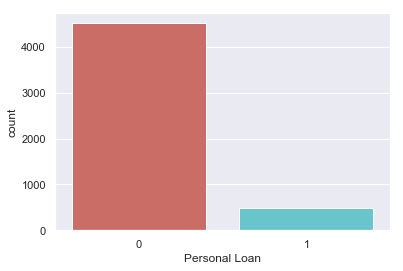

In [29]:
sns.countplot(x='Personal Loan', data=pldf, palette='hls')
plt.show()

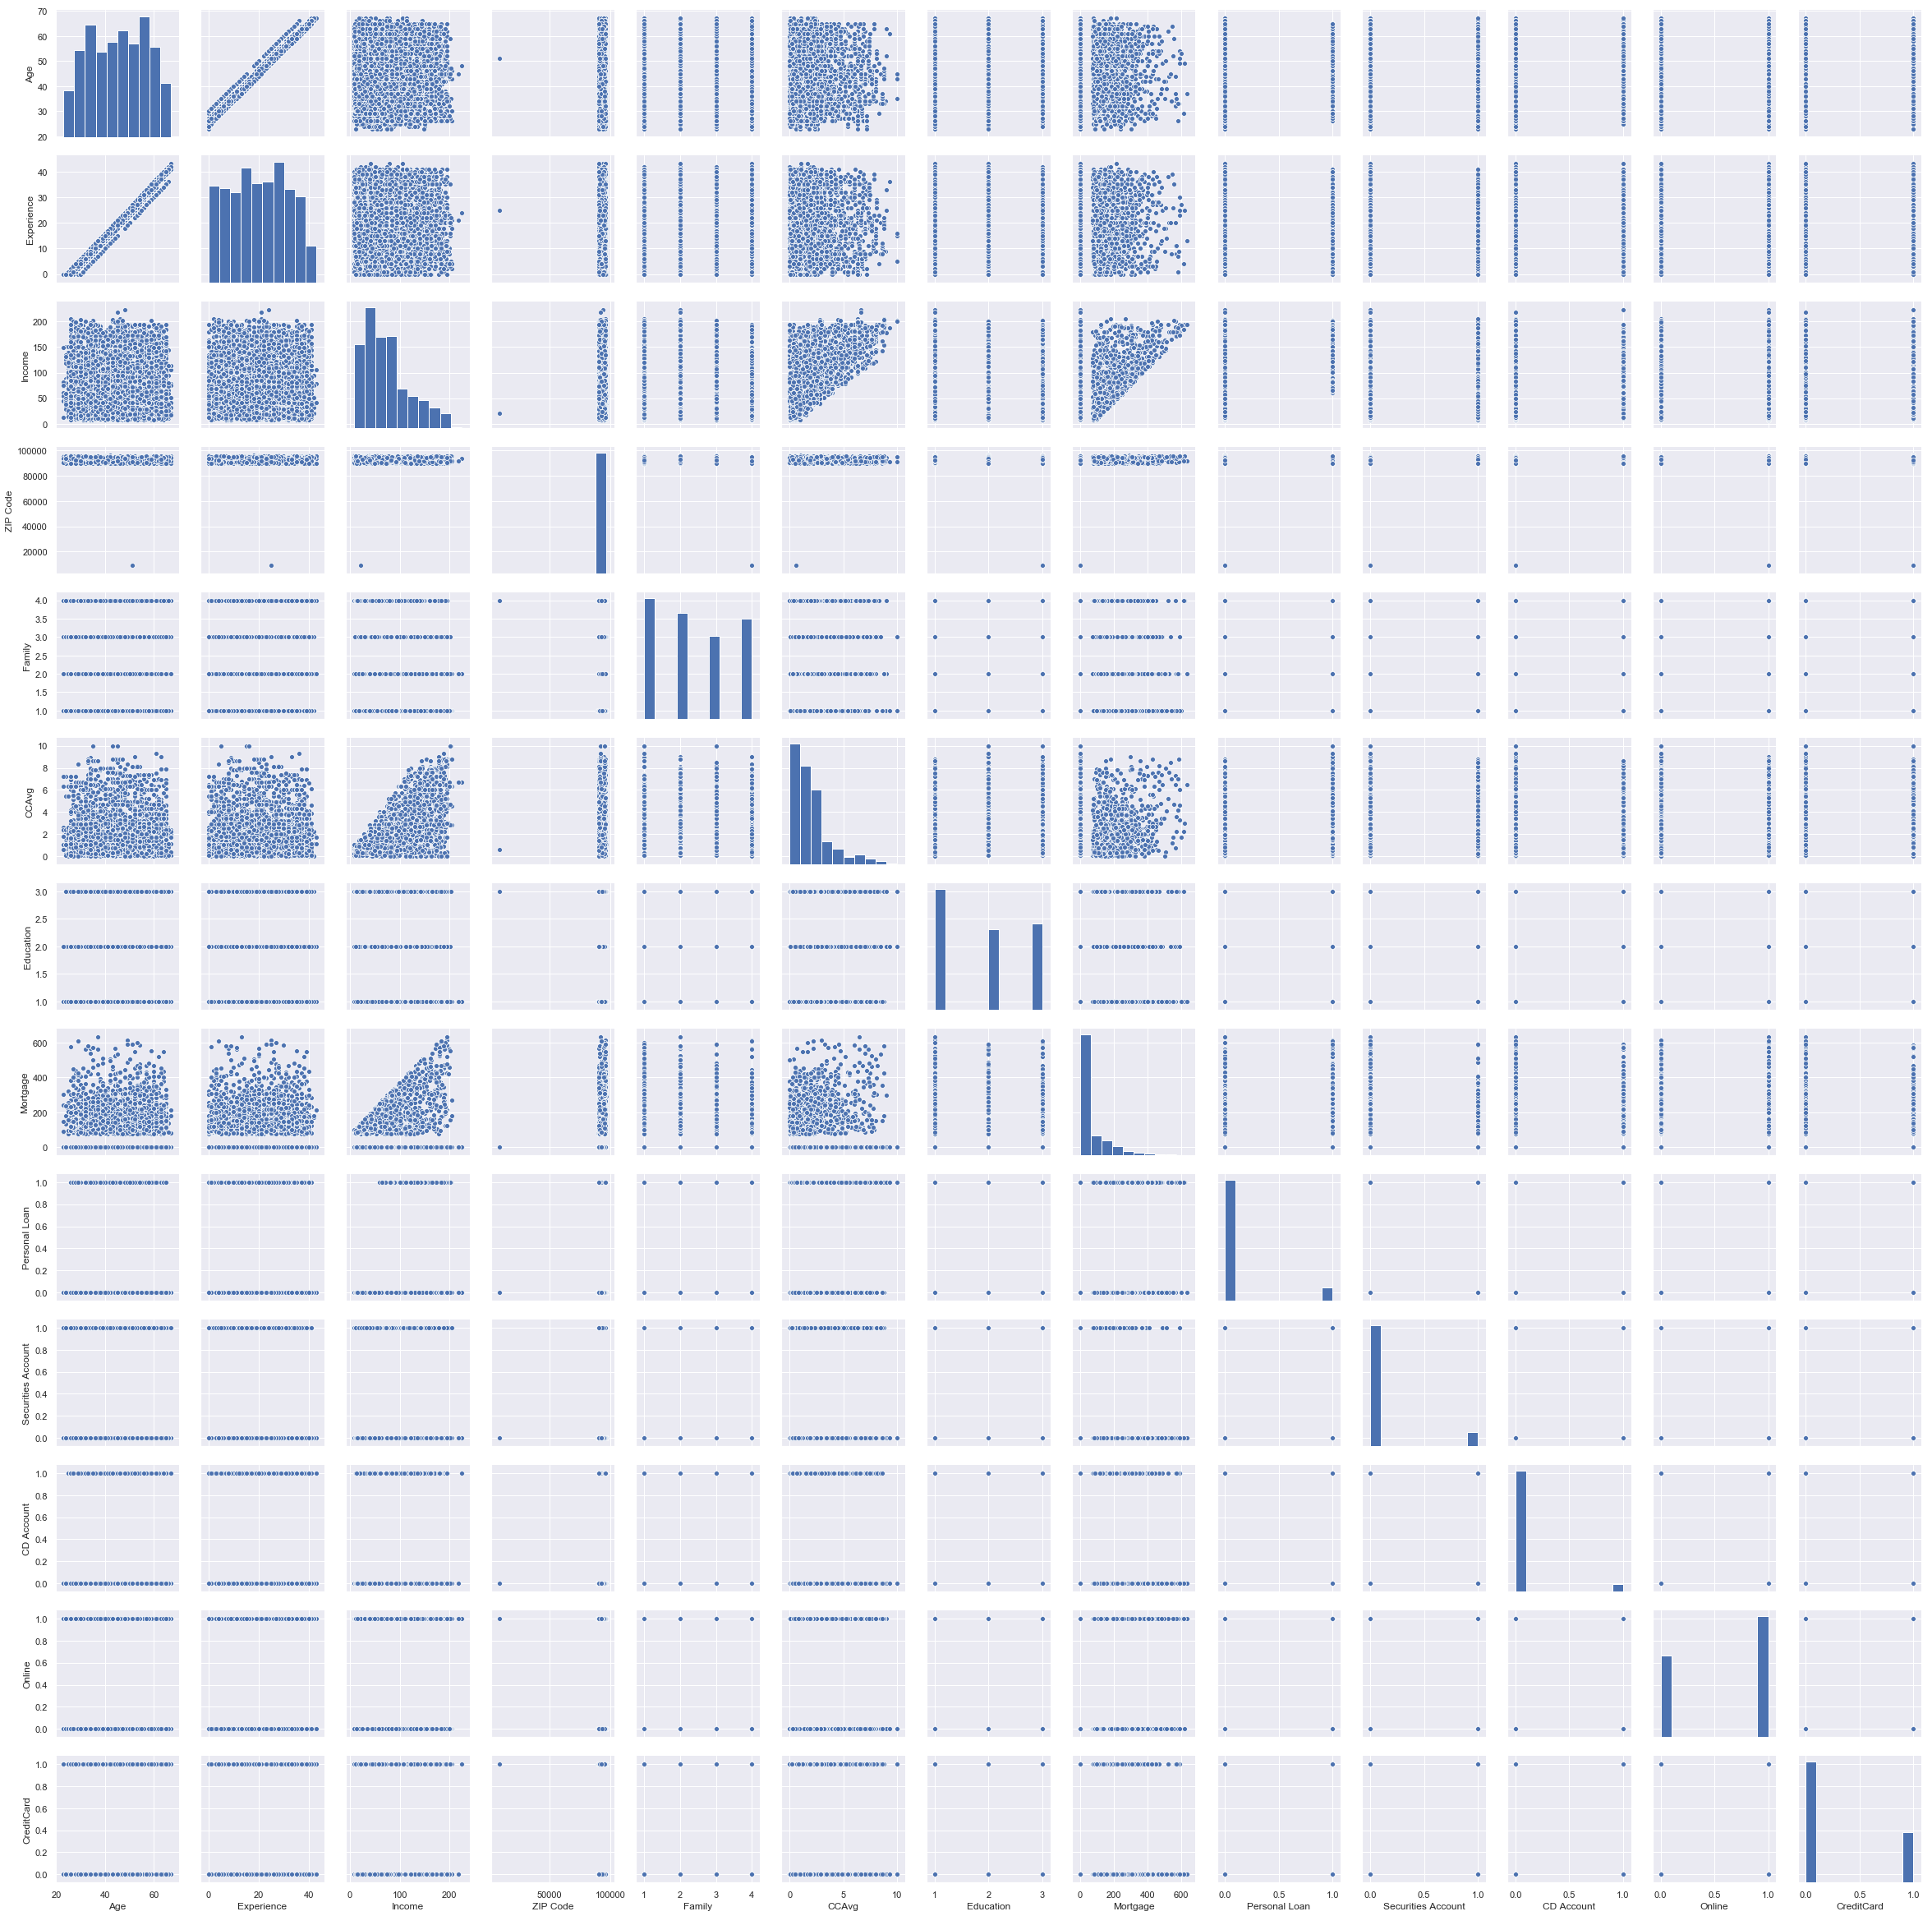

In [30]:
sns.pairplot(pldf)

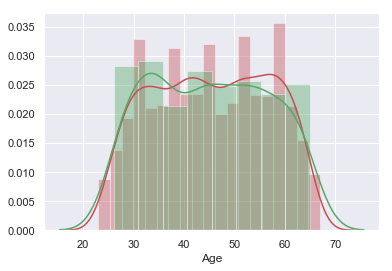

In [31]:
sns.distplot( pldf[pldf['Personal Loan'] == 0]['Age'], color = 'r')
sns.distplot( pldf[pldf['Personal Loan'] == 1]['Age'], color = 'g')

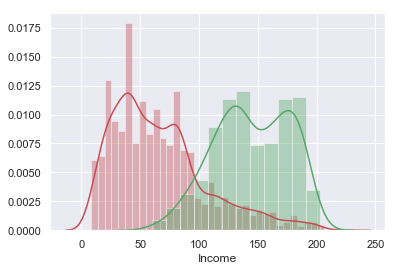

In [33]:
sns.distplot( pldf[pldf['Personal Loan'] == 0]['Income'], color = 'r')
sns.distplot( pldf[pldf['Personal Loan'] == 1]['Income'], color = 'g')

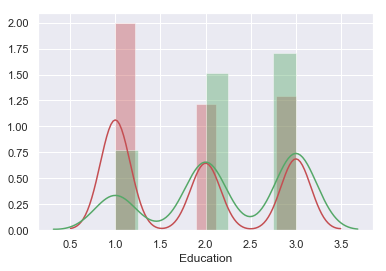

In [34]:
sns.distplot( pldf[pldf['Personal Loan'] == 0]['Education'], color = 'r')
sns.distplot( pldf[pldf['Personal Loan'] == 1]['Education'], color = 'g')

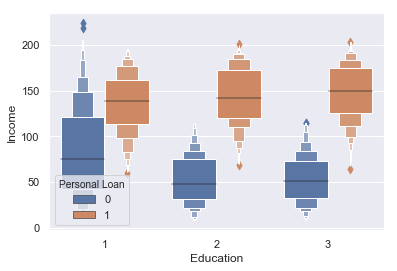

In [35]:
# Check how much personal loan dependent on Income and Education

sns.boxenplot(x='Education', y='Income', hue='Personal Loan', data=pldf)

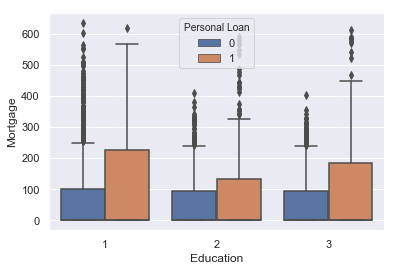

In [36]:
sns.boxplot(x="Education", y='Mortgage', hue="Personal Loan", data=pldf)

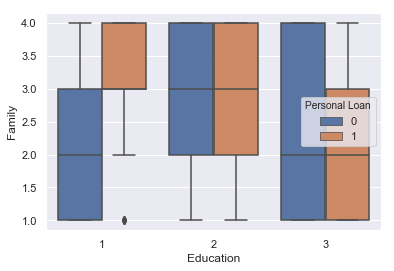

In [37]:
sns.boxplot(x="Education", y='Family', hue="Personal Loan", data=pldf)

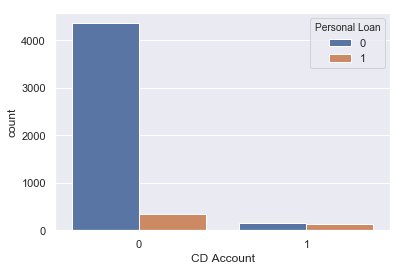

In [38]:
sns.countplot(x="CD Account", data=pldf,hue="Personal Loan")

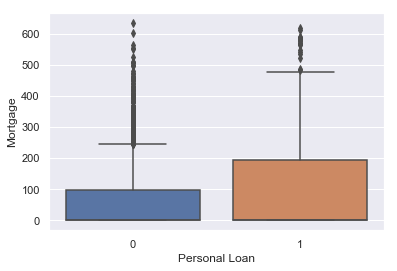

In [39]:
sns.boxplot(x = 'Personal Loan', y = 'Mortgage', data = pldf)

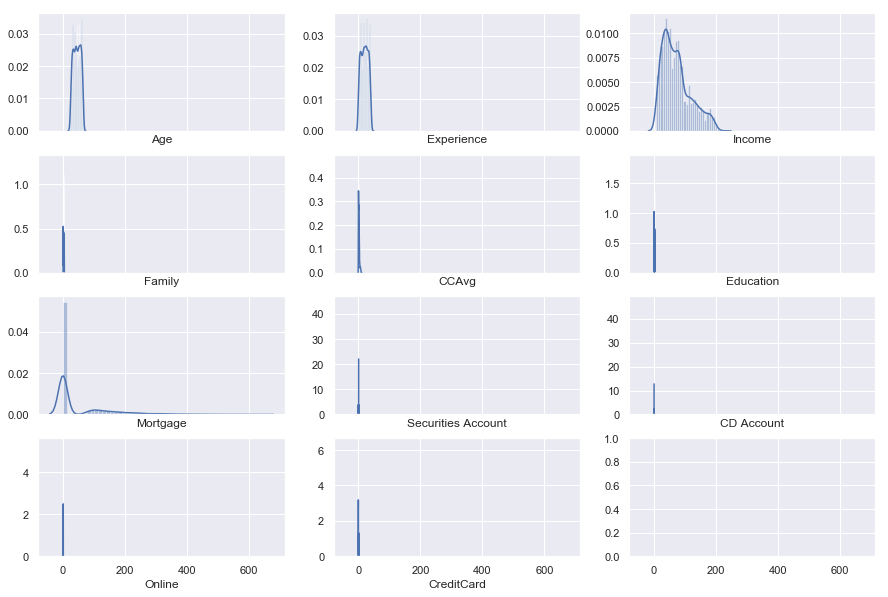

In [40]:
plcpy = pldf.copy(deep=True)
f, axes = plt.subplots(4, 3, figsize=(15, 10), sharex=True)
sns.distplot(plcpy["Age"], rug=False, ax=axes[0, 0])
sns.distplot(plcpy["Experience"], rug=False, ax=axes[0, 1])
sns.distplot(plcpy["Income"], rug=False, ax=axes[0, 2])
sns.distplot(plcpy["Family"], rug=False, ax=axes[1, 0])
sns.distplot(plcpy["CCAvg"], rug=False, ax=axes[1, 1])
sns.distplot(plcpy["Education"], rug=False, ax=axes[1, 2])
sns.distplot(plcpy["Mortgage"], rug=False, ax=axes[2, 0])
sns.distplot(plcpy["Securities Account"], rug=False, ax=axes[2, 1])
sns.distplot(plcpy["CD Account"], rug=False, ax=axes[2, 2])
sns.distplot(plcpy["Online"], rug=False, ax=axes[3, 0])
sns.distplot(plcpy["CreditCard"], rug=False, ax=axes[3, 1])

In [145]:
#Correlating
#Trying to learn how well each feature correlate with personal loan acceptance

In [146]:
#Bi-Variate Analysis
pldf[['CreditCard', 'Personal Loan']].groupby(['CreditCard'], as_index=False).mean().sort_values(by='Personal Loan', ascending=False)

,CreditCard,Personal Loan
1,1,0.097279
0,0,0.095467


In [147]:
pldf[['Online', 'Personal Loan']].groupby(['Online'], as_index=False).mean().sort_values(by='Personal Loan', ascending=False)

,Online,Personal Loan
1,1,0.09752
0,0,0.09375


In [148]:
pldf[['Family', 'Personal Loan']].groupby(['Family'], as_index=False).mean().sort_values(by='Personal Loan', ascending=False)

,Family,Personal Loan
2,3,0.131683
3,4,0.109656
1,2,0.081790
0,1,0.072690


In [149]:
pldf[['Education', 'Personal Loan']].groupby(['Education'], as_index=False).mean().sort_values(by='Personal Loan', ascending=False)

,Education,Personal Loan
2,3,0.136576
1,2,0.129722
0,1,0.044370


In [150]:
pldf[['CD Account', 'Personal Loan']].groupby(['CD Account'], as_index=False).mean().sort_values(by='Personal Loan', ascending=False)

,CD Account,Personal Loan
1,1,0.463576
0,0,0.072371


In [151]:
pldf[['Securities Account', 'Personal Loan']].groupby(['Securities Account'], as_index=False).mean().sort_values(by='Personal Loan', ascending=False)

,Securities Account,Personal Loan
1,1,0.114943
0,0,0.093792


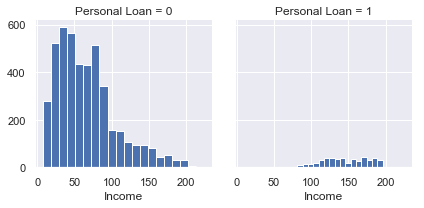

In [152]:
FG = sns.FacetGrid(pldf, col='Personal Loan')
FG.map(plt.hist,'Income', bins=20)

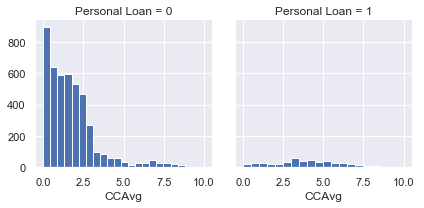

In [154]:
FG = sns.FacetGrid(pldf, col='Personal Loan')
FG.map(plt.hist,'CCAvg', bins=20)

C:\Users\Dell\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


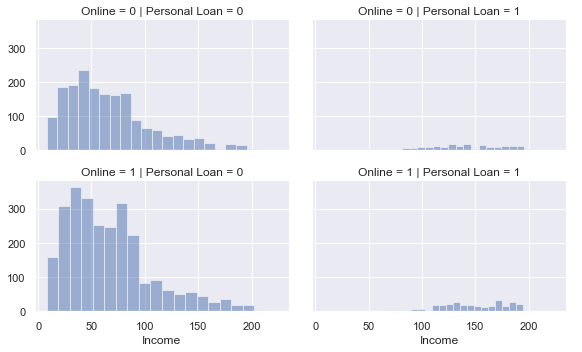

In [155]:
grid = sns.FacetGrid(pldf, col='Personal Loan', row='Online', size=2.5, aspect=1.6)
grid.map(plt.hist, 'Income', alpha=.5, bins=20)
grid.add_legend();

## Supervised Learning

Create a dictionary to store all model name, train set score, test set score, 

In [41]:
model_scores={}
def model_score(dict_key, key, value):
    if dict_key not in model_scores.keys():
        model_scores[dict_key] = {}
        
    model_scores[dict_key][key] = value*100
        
    print(model_scores)

Split the data for training and test set in the ratio of 70:30 respectively 

In [42]:
from sklearn.model_selection import train_test_split

In [43]:
X = pldf.drop(['Personal Loan'], axis=1)
y = pldf['Personal Loan']
test_size = 0.30
seed = 10

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)

In [109]:
#Create function for result dataframe and append results

In [100]:
#resultsdf = pd.DataFrame(columns=['Method','Type','kernel','Accuracy'])

In [107]:
#def result_df(resultsDf, temp_df):
    
#    if temp_df['Method'] in resultsDf['Method']:
#        if temp_df['Type'] in resultsDf['Type']:
#            if temp_df['kernel'] in resultsDf['kernel']:
#                resultsDf[resultsDf['Method'] == temp_df['Method'] & resultsDf['Type'] == temp_df['Type'] & resultsDf['kernel'] == temp_df['kernel']]['Accuracy'] = temp_df['Accuracy']
#            else:
#                resultsDf = pd.concat([resultsDf, temp_df])
#        else:
#            resultsDf = pd.concat([resultsDf, temp_df])
#    else:
#        resultsDf = pd.concat([resultsDf, temp_df])
        
#    resultsdf
    
    

## Logistic Regression

In [45]:
from sklearn.linear_model import LogisticRegression

In [46]:
LogR = LogisticRegression()
LogR.fit(X_train, y_train)

y_LR_predict = LogR.predict(X_test)
LogR_Test_Score = LogR.score(X_test, y_test)
LogR_Test_Score

# Feed the dictionary with model score values
#model_score('LogR','Test Score',LogR_Test_Score)

C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.8986666666666666

In [47]:
LogR_Train_Score = LogR.score(X_train, y_train)
LogR_Train_Score
#model_score('LogR','Train Score',LogR_Train_Score)

0.9108571428571428

In [48]:
#Store the accuracy results for each kernel in a dataframe for final comparison
resultsDf = pd.DataFrame({'Method':['Logistic Regression'], 'Type':['Train'], 'Kernel':'', 'Accuracy': LogR_Train_Score})
tempResultsDf = pd.DataFrame({'Method':['Logistic Regression'], 'Type':['Test'], 'Kernel':'', 'Accuracy': LogR_Test_Score})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf

,Method,Type,Kernel,Accuracy
0,Logistic Regression,Train,,0.910857
0,Logistic Regression,Test,,0.898667


In [108]:
#result_df(resultsDf ,tempResultsDf)

In [49]:
col=list(X_train.columns)
coef_df = pd.DataFrame(LogR.coef_, columns= col)
coef_df['intercept'] = LogR.intercept_
print('Contribution of features on target value:')
print(coef_df)

Contribution of features on target value:
        Age  Experience   Income  ZIP Code    Family    CCAvg  Education  \
0  0.006958    0.004432  0.03755 -0.000071  0.015277  0.00558   0.017989   

   Mortgage  Securities Account  CD Account    Online  CreditCard  intercept  
0  0.000532            0.001128    0.004832 -0.000509   -0.000132  -0.000083  


For accuracy and confusion matrix calculation

In [50]:
from scipy import stats
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score

In [51]:
print(metrics.confusion_matrix(y_test,y_LR_predict))

[[1301   59]
 [  93   47]]


In [52]:
print(metrics.classification_report(y_test,y_LR_predict))

              precision    recall  f1-score   support

           0       0.93      0.96      0.94      1360
           1       0.44      0.34      0.38       140

   micro avg       0.90      0.90      0.90      1500
   macro avg       0.69      0.65      0.66      1500
weighted avg       0.89      0.90      0.89      1500



In [53]:
# Is our model still predicting just one class?
print( np.unique( y_LR_predict ) )

[0 1]


In [54]:
print(metrics.recall_score(y_test,y_LR_predict))

0.3357142857142857


Applying Scaled data in Logistic Regression

In [55]:
from sklearn import preprocessing

In [56]:
ZX = preprocessing.scale(X)
ZX_train, ZX_test, y_train, y_test = train_test_split(ZX, y, test_size=0.3, random_state=10)

C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  """Entry point for launching an IPython kernel.


In [57]:
LogRZ = LogisticRegression()
LogRZ.fit(ZX_train, y_train)

y_LRZ_predict = LogRZ.predict(ZX_test)

col=list(X_train.columns)
print('Contribution of features on target values:')
coef_df = pd.DataFrame(LogRZ.coef_, columns= col)
coef_df['intercept'] = LogRZ.intercept_
print(coef_df)

Contribution of features on target values:
        Age  Experience    Income  ZIP Code    Family     CCAvg  Education  \
0 -0.183144    0.276845  2.435126 -0.026949  0.757253  0.182585   1.345855   

   Mortgage  Securities Account  CD Account    Online  CreditCard  intercept  
0  0.002352           -0.211003    0.843348 -0.356647   -0.471949  -4.466101  


C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [58]:
# Calculate score and print confusion Matrix

LogR_Test_scaled_score = LogRZ.score(ZX_test, y_test)
print('Model Scaled Test score:')
print(LogR_Test_scaled_score)
print('\n')
LogR_Train_scaled_score = LogRZ.score(ZX_train, y_train)
print('Model Scaled Train score:')
print(LogR_Train_scaled_score)
print('\n')
print('Confusion Matrix:')
print(metrics.confusion_matrix(y_test, y_LRZ_predict))
print('\n')
print('Report:')
print(metrics.classification_report(y_test, y_LRZ_predict))

Model Scaled Test score:
0.9526666666666667


Model Scaled Train score:
0.9505714285714286


Confusion Matrix:
[[1339   21]
 [  50   90]]


Report:
              precision    recall  f1-score   support

           0       0.96      0.98      0.97      1360
           1       0.81      0.64      0.72       140

   micro avg       0.95      0.95      0.95      1500
   macro avg       0.89      0.81      0.85      1500
weighted avg       0.95      0.95      0.95      1500



In [59]:
tempResultsDf = pd.DataFrame({'Method':['Logistic Regression'], 'Type':['Scaled Train'], 'Kernel':'', 'Accuracy': LogR_Train_scaled_score})
resultsDf = pd.concat([resultsDf, tempResultsDf])
tempResultsDf = pd.DataFrame({'Method':['Logistic Regression'], 'Type':['Scaled Test'], 'Kernel':'', 'Accuracy': LogR_Test_scaled_score})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf

,Method,Type,Kernel,Accuracy
0,Logistic Regression,Train,,0.910857
0,Logistic Regression,Test,,0.898667
0,Logistic Regression,Scaled Train,,0.950571
0,Logistic Regression,Scaled Test,,0.952667


In [60]:
#model_score('LogR','Scaled Test Score',LogR_Test_scaled_score)
#model_score('LogR','Scaled Train Score',LogR_Train_scaled_score)

### Upsampling the Minority class 

In [138]:
from sklearn.utils import resample

In [139]:
# Separate majority and minority classes
df_majority = pldf[pldf["Personal Loan"]==0]
df_minority = pldf[pldf["Personal Loan"]==1]
 
# Upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples=4520,    # to match majority class
                                 random_state=123) # reproducible results
 
# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_majority, df_minority_upsampled])
 
# Display new class counts
df_upsampled['Personal Loan'].value_counts()


1    4520
0    4520
Name: Personal Loan, dtype: int64

In [141]:

# Separate input features (X) and target variable (y)
yu = df_upsampled['Personal Loan']
XU = df_upsampled.drop('Personal Loan', axis=1)
 
# Train model
LogR_up = LogisticRegression().fit(XU, yu)
 
# Predict on training set
y_LogR_up_predict = LogR_up.predict(XU)
 
# Is our model still predicting just one class?
print( np.unique( y_LogR_up_predict ) )
# [0 1]
 
# accuracy?
print( accuracy_score(yu, y_LogR_up_predict) )


C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[0 1]
0.8953539823008849


Change your performance metrics

In [62]:
from sklearn.metrics import roc_auc_score

In [142]:
# Predict class probabilities
y_LogR_up_predict = LogR_up.predict_proba(XU)
 
# Keep only the positive class
y_LogR_up_predict = [p[1] for p in y_LogR_up_predict]
 
y_LogR_up_predict[:5]

[0.014066375087556957,
 0.002923704067771771,
 0.0006317689030934691,
 0.2465875793321554,
 0.02905742062108581]

In [143]:
print( roc_auc_score(yu, y_LogR_up_predict) )

0.9615390300728327


#### Naive Bayes

In [63]:
from sklearn.naive_bayes import GaussianNB

In [64]:
NB = GaussianNB()
NB.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [65]:
y_NB_predict = NB.predict(X_test)

In [66]:
y_NB_test_score = NB.score(X_test, y_test)
y_NB_test_score

0.8853333333333333

In [67]:
y_NB_train_score = NB.score(X_train, y_train)
y_NB_train_score

0.8885714285714286

In [68]:
accuracy_score(y_test, y_NB_predict, normalize = True)

0.8853333333333333

In [69]:
#model_score('NB','Test Score',y_NB_test_score)


In [70]:
#model_score('NB','Train Score',y_NB_train_score)

In [71]:
tempResultsDf = pd.DataFrame({'Method':['Naive Bayes'], 'Type':['Train'], 'Kernel':'', 'Accuracy': y_NB_train_score})
resultsDf = pd.concat([resultsDf, tempResultsDf])
tempResultsDf = pd.DataFrame({'Method':['Naive Bayes'], 'Type':['Test'], 'Kernel':'', 'Accuracy': y_NB_test_score})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf

,Method,Type,Kernel,Accuracy
0,Logistic Regression,Train,,0.910857
0,Logistic Regression,Test,,0.898667
0,Logistic Regression,Scaled Train,,0.950571
0,Logistic Regression,Scaled Test,,0.952667
0,Naive Bayes,Train,,0.888571
0,Naive Bayes,Test,,0.885333


In [72]:
print (metrics.confusion_matrix(y_test, y_NB_predict))

[[1242  118]
 [  54   86]]


In [73]:
print (metrics.classification_report(y_test, y_NB_predict))

              precision    recall  f1-score   support

           0       0.96      0.91      0.94      1360
           1       0.42      0.61      0.50       140

   micro avg       0.89      0.89      0.89      1500
   macro avg       0.69      0.76      0.72      1500
weighted avg       0.91      0.89      0.89      1500



In [74]:
print(metrics.recall_score(y_test,y_NB_predict))

0.6142857142857143


Applying scaled data on Naive Bayes

In [75]:
NBZ = GaussianNB()
NBZ.fit(ZX_train, y_train)
y_NBZ_predict = NBZ.predict(ZX_test)

NBZ_Test_score = NBZ.score(ZX_test, y_test)

NBZ_Train_score = NBZ.score(ZX_train, y_train)

tempResultsDf = pd.DataFrame({'Method':['Naive Bayes'], 'Type':['Scaled Train'], 'Kernel':'', 'Accuracy': NBZ_Train_score})
resultsDf = pd.concat([resultsDf, tempResultsDf])
tempResultsDf = pd.DataFrame({'Method':['Naive Bayes'], 'Type':['Scaled Test'], 'Kernel':'', 'Accuracy': NBZ_Test_score})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf

,Method,Type,Kernel,Accuracy
0,Logistic Regression,Train,,0.910857
0,Logistic Regression,Test,,0.898667
0,Logistic Regression,Scaled Train,,0.950571
0,Logistic Regression,Scaled Test,,0.952667
0,Naive Bayes,Train,,0.888571
0,Naive Bayes,Test,,0.885333
0,Naive Bayes,Scaled Train,,0.883714
0,Naive Bayes,Scaled Test,,0.878667


In [76]:
print('Confusion Matrix:')
print(metrics.confusion_matrix(y_test, y_NBZ_predict))
print('\n')
print('Report:')
print(metrics.classification_report(y_test, y_NBZ_predict))

Confusion Matrix:
[[1234  126]
 [  56   84]]


Report:
              precision    recall  f1-score   support

           0       0.96      0.91      0.93      1360
           1       0.40      0.60      0.48       140

   micro avg       0.88      0.88      0.88      1500
   macro avg       0.68      0.75      0.71      1500
weighted avg       0.90      0.88      0.89      1500



#### K-Nearest Neighbour

In [77]:
from sklearn.neighbors import KNeighborsClassifier

In [78]:
# creating odd list of K for KNN
myList = list(range(1,10))

# subsetting just the odd ones
neighbors = list(filter(lambda x: x % 2 != 0, myList))

In [79]:
# empty list that will hold accuracy scores
knn_ac_scores = []

# perform accuracy metrics for values from 1,3,5....19
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    # predict the response
    y_knn_pred = knn.predict(X_test)
    # evaluate accuracy
    scores = accuracy_score(y_test, y_knn_pred)
    knn_ac_scores.append(scores)

# changing to misclassification error
MSE = [1 - x for x in knn_ac_scores]

print (MSE)

# determining best k
optimal_k = neighbors[MSE.index(min(MSE))]
print("The optimal number of neighbors is %d" % optimal_k)

[0.1233333333333333, 0.10933333333333328, 0.10399999999999998, 0.10333333333333339, 0.10066666666666668]
The optimal number of neighbors is 9


In [80]:
n_knn = KNeighborsClassifier(n_neighbors=optimal_k)
n_knn.fit(X_train, y_train)
y_n_knn_predict = n_knn.predict(X_test)
knn_test_score = n_knn.score(X_test,y_test)
knn_train_score = n_knn.score(X_train, y_train)

#model_score('KNN','Test Score',knn_test_score)
#model_score('KNN','Train Score',knn_train_score)
tempResultsDf = pd.DataFrame({'Method':['KNN'], 'Type':['Train'], 'Kernel':'', 'Accuracy': knn_train_score})
resultsDf = pd.concat([resultsDf, tempResultsDf])
tempResultsDf = pd.DataFrame({'Method':['KNN'], 'Type':['Test'], 'Kernel':'', 'Accuracy': knn_test_score})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf

,Method,Type,Kernel,Accuracy
0,Logistic Regression,Train,,0.910857
0,Logistic Regression,Test,,0.898667
0,Logistic Regression,Scaled Train,,0.950571
0,Logistic Regression,Scaled Test,,0.952667
0,Naive Bayes,Train,,0.888571
0,Naive Bayes,Test,,0.885333
0,Naive Bayes,Scaled Train,,0.883714
0,Naive Bayes,Scaled Test,,0.878667
0,KNN,Train,,0.917429
0,KNN,Test,,0.899333


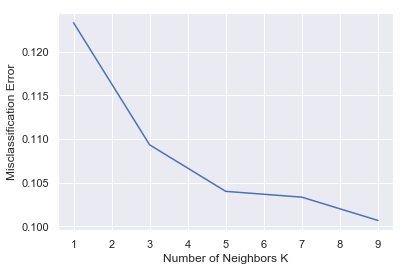

In [81]:
plt.plot(neighbors, MSE)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()

In [82]:
print('Confusion Matrix:')
print(metrics.confusion_matrix(y_test, y_n_knn_predict))
print('\n')
print('Report:')
print(metrics.classification_report(y_test, y_n_knn_predict))

Confusion Matrix:
[[1328   32]
 [ 119   21]]


Report:
              precision    recall  f1-score   support

           0       0.92      0.98      0.95      1360
           1       0.40      0.15      0.22       140

   micro avg       0.90      0.90      0.90      1500
   macro avg       0.66      0.56      0.58      1500
weighted avg       0.87      0.90      0.88      1500



In [83]:
print (accuracy_score(y_test, y_knn_pred))

0.8993333333333333


In [84]:
print (recall_score(y_test, y_knn_pred))

0.15


Applying scaled data on KNN

In [85]:
KNNZ = KNeighborsClassifier(n_neighbors= 9 , weights = 'distance' )
KNNZ.fit(ZX_train, y_train)
y_KNNZ_predict = KNNZ.predict(ZX_test)

KNNZ_Test_score = KNNZ.score(ZX_test, y_test)
KNNZ_Train_score = KNNZ.score(ZX_train, y_train)

tempResultsDf = pd.DataFrame({'Method':['KNN'], 'Type':['Scaled Train'], 'Kernel':'', 'Accuracy': KNNZ_Train_score})
resultsDf = pd.concat([resultsDf, tempResultsDf])
tempResultsDf = pd.DataFrame({'Method':['KNN'], 'Type':['Scaled Test'], 'Kernel':'', 'Accuracy': KNNZ_Test_score})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf

,Method,Type,Kernel,Accuracy
0,Logistic Regression,Train,,0.910857
0,Logistic Regression,Test,,0.898667
0,Logistic Regression,Scaled Train,,0.950571
0,Logistic Regression,Scaled Test,,0.952667
0,Naive Bayes,Train,,0.888571
0,Naive Bayes,Test,,0.885333
0,Naive Bayes,Scaled Train,,0.883714
0,Naive Bayes,Scaled Test,,0.878667
0,KNN,Train,,0.917429
0,KNN,Test,,0.899333


In [86]:
print('Confusion Matrix:')
print(metrics.confusion_matrix(y_test, y_KNNZ_predict))
print('\n:')
print('Report:')
print(metrics.classification_report(y_test, y_KNNZ_predict))

Confusion Matrix:
[[1356    4]
 [  60   80]]

:
Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1360
           1       0.95      0.57      0.71       140

   micro avg       0.96      0.96      0.96      1500
   macro avg       0.96      0.78      0.85      1500
weighted avg       0.96      0.96      0.95      1500



#### Support Vector Machine

In [87]:
from sklearn.svm import SVC

In [88]:
# Building a Support Vector Machine on train data
for k in  ['linear','rbf','sigmoid']: #poly - ignoring this as it takes time and the result is not better than linear/rbf
    svc_model= SVC(kernel=k)
    svc_model.fit(X_train, y_train)

    y_svm_predict = svc_model.predict(X_test)

    # check the accuracy on the training set
    svm_train_score = svc_model.score(X_train, y_train)
    svm_test_score = svc_model.score(X_test, y_test)
    
    tempResultsDf = pd.DataFrame({'Method':['SVM'], 'Type':['Train'], 'Kernel':k, 'Accuracy': svm_train_score})
    resultsDf = pd.concat([resultsDf, tempResultsDf])
    tempResultsDf = pd.DataFrame({'Method':['SVM'], 'Type':['Test'], 'Kernel':k, 'Accuracy': svm_test_score})
    resultsDf = pd.concat([resultsDf, tempResultsDf])

#model_score('SVM','Test Score',svm_test_score)
#model_score('SVM','Train Score',svm_train_score)


C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [89]:
resultsDf

,Method,Type,Kernel,Accuracy
0,Logistic Regression,Train,,0.910857
0,Logistic Regression,Test,,0.898667
0,Logistic Regression,Scaled Train,,0.950571
0,Logistic Regression,Scaled Test,,0.952667
0,Naive Bayes,Train,,0.888571
0,Naive Bayes,Test,,0.885333
0,Naive Bayes,Scaled Train,,0.883714
0,Naive Bayes,Scaled Test,,0.878667
0,KNN,Train,,0.917429
0,KNN,Test,,0.899333


On the above SVM model, rbf kernel performs better,

In [121]:
svc_model= SVC(kernel='rbf')
svc_model.fit(X_train, y_train)

y_svm_predict = svc_model.predict(X_test)

print (svc_model.score(X_test, y_test))

C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.9066666666666666


In [122]:
print (metrics.confusion_matrix(y_test, y_svm_predict))

[[1360    0]
 [ 140    0]]


In [120]:
print (metrics.classification_report(y_test, y_svm_predict))

              precision    recall  f1-score   support

           0       0.91      1.00      0.95      1360
           1       0.00      0.00      0.00       140

   micro avg       0.91      0.91      0.91      1500
   macro avg       0.45      0.50      0.48      1500
weighted avg       0.82      0.91      0.86      1500



C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [123]:
print (accuracy_score(y_test, y_svm_predict))

0.9066666666666666


In [124]:
print (recall_score(y_test, y_svm_predict))

0.0


Applying scaled data on SVM model

In [111]:
# Building a Support Vector Machine on train data
for k in  ['linear','rbf','sigmoid']: #poly - ignoring this as it takes time and the result is not better than linear/rbf
    svc_model= SVC(kernel=k)
    svc_model.fit(ZX_train, y_train)

    y_SVMZ_predict = svc_model.predict(ZX_test)

    # check the accuracy on the training set
    SVMZ_train_score = svc_model.score(ZX_train, y_train)
    SVMZ_test_score = svc_model.score(ZX_test, y_test)
    
    tempResultsDf = pd.DataFrame({'Method':['SVM'], 'Type':['Scaled Train'], 'Kernel':k, 'Accuracy': SVMZ_train_score})
    resultsDf = pd.concat([resultsDf, tempResultsDf])
    tempResultsDf = pd.DataFrame({'Method':['SVM'], 'Type':['Scaled Test'], 'Kernel':k, 'Accuracy': SVMZ_test_score})
    resultsDf = pd.concat([resultsDf, tempResultsDf])

C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [112]:
resultsDf

,Method,Type,Kernel,Accuracy
0,Logistic Regression,Train,,0.910857
0,Logistic Regression,Test,,0.898667
0,Logistic Regression,Scaled Train,,0.950571
0,Logistic Regression,Scaled Test,,0.952667
0,Naive Bayes,Train,,0.888571
0,Naive Bayes,Test,,0.885333
0,Naive Bayes,Scaled Train,,0.883714
0,Naive Bayes,Scaled Test,,0.878667
0,KNN,Train,,0.917429
0,KNN,Test,,0.899333


On Scaled data applied in SVM , rbf kernel provides better result,

In [114]:
svc_model= SVC(kernel='rbf')
svc_model.fit(ZX_train, y_train)

y_SVMZ_predict = svc_model.predict(ZX_test)

C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [115]:
print('Confusion Matrix:')
print(metrics.confusion_matrix(y_test, y_SVMZ_predict))
print('\n:')
print('Report:')
print(metrics.classification_report(y_test, y_SVMZ_predict))

Confusion Matrix:
[[1356    4]
 [  34  106]]

:
Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1360
           1       0.96      0.76      0.85       140

   micro avg       0.97      0.97      0.97      1500
   macro avg       0.97      0.88      0.92      1500
weighted avg       0.97      0.97      0.97      1500



#### Best Model and Accuracy of all models

In [110]:
#def myprint(scores):
#  for key, value in scores.items():
#    if isinstance(value, dict):
#        print (key)
#        myprint(value)
#    else:
#        print("\t {0} : {1}".format(key, value))

# No more using this model_scores dictionary, keeping it in  dataframe
#myprint(model_scores)

In [133]:
#import re
#options = ['Scaled Train', 'Scaled Test']
Unscaled_df = resultsDf[~resultsDf['Type'].str.contains("Scaled")]
#Unscaled_df = resultsdf.loc[resultsdf['Type'].isin(options)]
Unscaled_df

,Method,Type,Kernel,Accuracy
0,Logistic Regression,Train,,0.910857
0,Logistic Regression,Test,,0.898667
0,Naive Bayes,Train,,0.888571
0,Naive Bayes,Test,,0.885333
0,KNN,Train,,0.917429
0,KNN,Test,,0.899333
0,SVM,Train,linear,0.913143
0,SVM,Test,linear,0.903333
0,SVM,Train,rbf,0.999714
0,SVM,Test,rbf,0.906667


In [134]:
Scaled_df = resultsDf[resultsDf['Type'].str.contains("Scaled")]
Scaled_df

,Method,Type,Kernel,Accuracy
0,Logistic Regression,Scaled Train,,0.950571
0,Logistic Regression,Scaled Test,,0.952667
0,Naive Bayes,Scaled Train,,0.883714
0,Naive Bayes,Scaled Test,,0.878667
0,KNN,Scaled Train,,1.000000
0,KNN,Scaled Test,,0.957333
0,SVM,Scaled Train,linear,0.951429
0,SVM,Scaled Test,linear,0.952667
0,SVM,Scaled Train,rbf,0.980286
0,SVM,Scaled Test,rbf,0.974667


### Conclusion